# DETEKSI TEPI DAN OPERASI GEOMETRIK

## IMPORT LIBRARY

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Rama Dinantiar (202331044)

In [4]:
image = cv2.imread('parkiran.jpg')
image.shape

# Rama Dinantiar (202331044)

(799, 1200, 3)

## DETEKSI TEPI

### MEMBACA GAMBAR

In [7]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Rama Dinantiar (202331044)

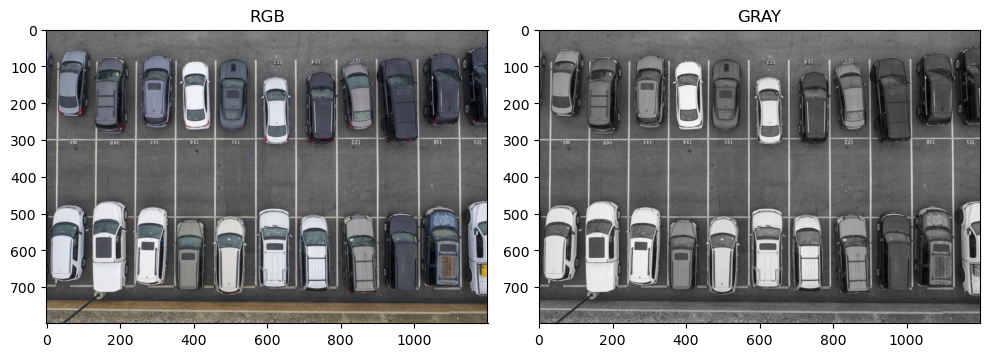

In [8]:
# Menampilkan gambar RGB dan Grayscale
fig, axs = plt.subplots(1,2, figsize=(10,10))

ax = axs.ravel()

ax[0].imshow(image_rgb)
ax[0].set_title("RGB")

ax[1].imshow(img_gray,cmap ='gray')
ax[1].set_title("GRAY")

plt.tight_layout()
plt.show()

# Rama Dinantiar (202331044)

### MENDETEKSI AMBANG BATAS DARI TEPI

In [10]:
# Deteksi tepi menggunakan Canny
edges = cv2.Canny(image, 100,150)
# Rama Dinantiar (202331044)

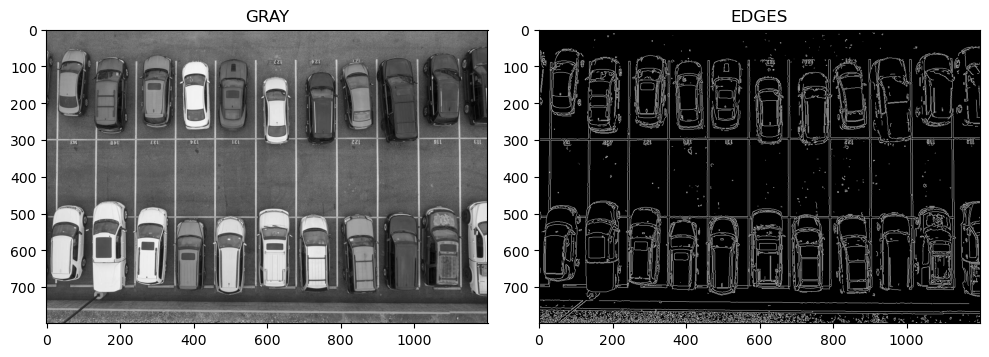

In [11]:
fig, axs = plt.subplots(1,2, figsize=(10,10))

ax = axs.ravel()

ax[0].imshow(img_gray,cmap='gray')
ax[0].set_title("GRAY")

ax[1].imshow(edges,cmap ='gray')
ax[1].set_title("EDGES")

plt.tight_layout()
plt.show()

# Rama Dinantiar (202331044)

In [12]:
# Deteksi garis menggunakan Hough Transform
lines = cv2.HoughLinesP(edges,1,np.pi/100,30, maxLineGap=150)

# Rama Dinantiar (202331044)

In [13]:
# Gambar salinan dari gambar asli untuk menggambar garis
img_line = image.copy()

# Menggambar garis-garis yang terdeteksi
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img_line, (x1, y1), (x2, y2), (100, 80, 255), 1)
    
# Rama Dinantiar (202331044)

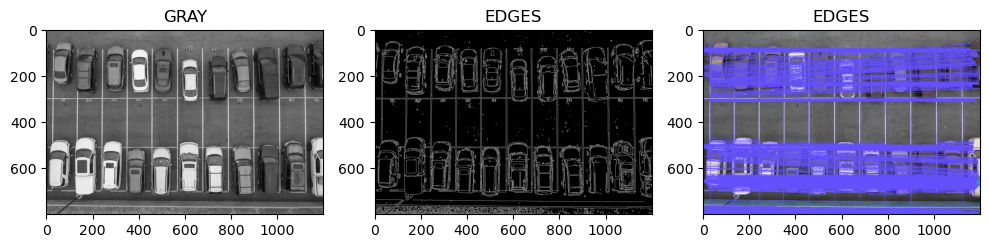

In [14]:
# Menampilkan gambar hasil deteksi garis
fig, axs = plt.subplots(1,3, figsize=(10,10))

ax = axs.ravel()

ax[0].imshow(img_gray,cmap='gray')
ax[0].set_title("GRAY")

ax[1].imshow(edges,cmap ='gray')
ax[1].set_title("EDGES")

ax[2].imshow(img_line,cmap ='gray')
ax[2].set_title("EDGES")

plt.tight_layout()
plt.show()

# Rama Dinantiar (202331044)

## OPERASI GEOMETRIK

### MEMBACA GAMBAR

In [17]:
img_padang = cv2.imread('gambar nasi padang.jpg')
rows, cols, _ = img_padang.shape
print('img shape: ', img_padang.shape)
# Rama Dinantiar (202331044)

img shape:  (1024, 1024, 3)


### CARA 1

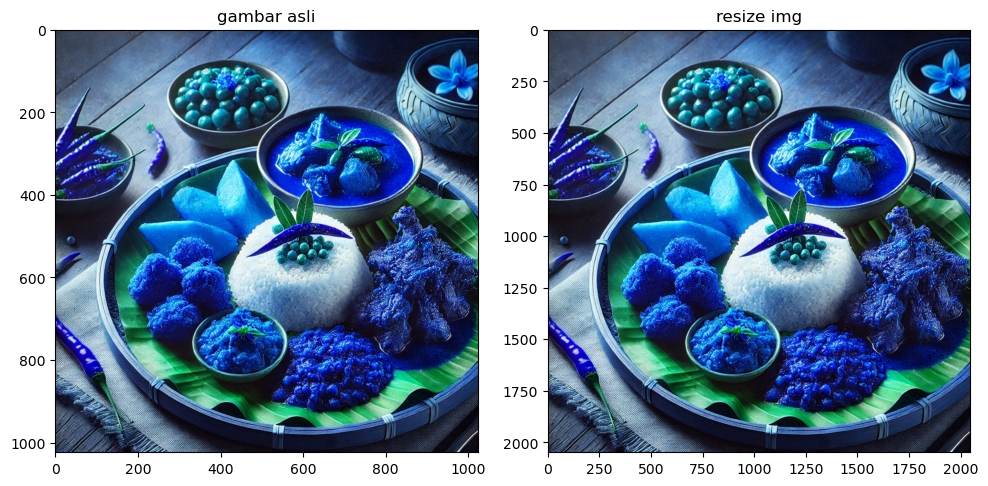

In [19]:
res = cv2.resize(img_padang, None, fx=2, fy=2,
                interpolation=cv2.INTER_CUBIC)
fig, axs = plt.subplots(1,2, figsize=(10,5))
ax = axs.ravel()

ax[0].imshow(img_padang)
ax[0].set_title('gambar asli')

ax[1].imshow(res)
ax[1].set_title('resize img')

plt.tight_layout()
plt.show()

# Rama Dinantiar (202331044)

## CARA 2

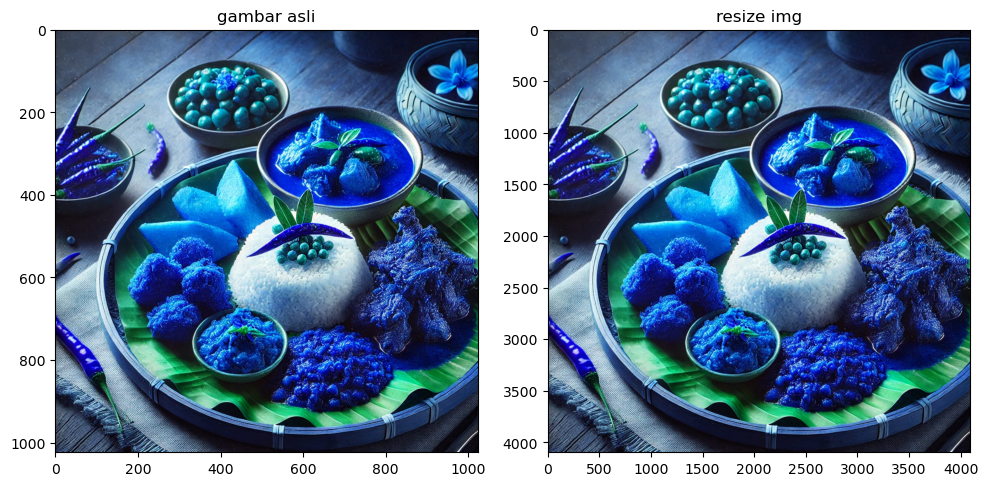

In [21]:
tinggi, lebar = img_padang.shape[:2]
res2 = cv2.resize(img_padang, (4*tinggi, 4*lebar),
                 interpolation=cv2.INTER_CUBIC)

fig, axs = plt.subplots(1,2, figsize=(10,5))
ax = axs.ravel()

ax[0].imshow(img_padang)
ax[0].set_title('gambar asli')

ax[1].imshow(res2)
ax[1].set_title('resize img')

plt.tight_layout()
plt.show()

# Rama Dinantiar (202331044)

## PENGAPLIKASIAN


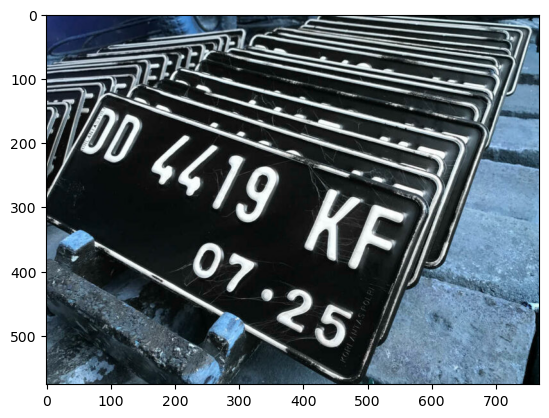

In [23]:
t = cv2.imread('plat.jpg')
plt.imshow(t)

# Rama Dinantiar (202331044)

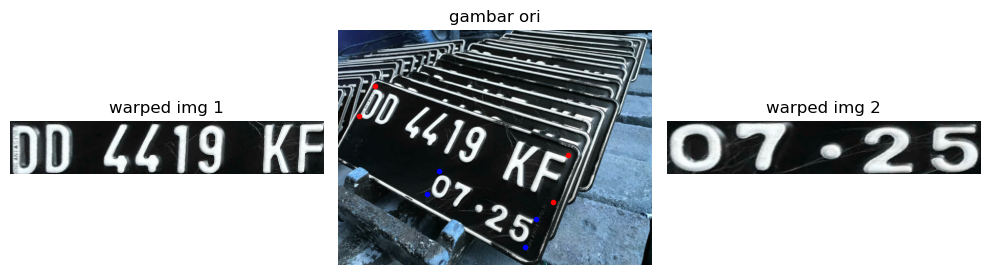

In [24]:
from skimage import transform

src = np.array([
    [0,0],
    [0,50],
    [300,50],
    [300,0]
])

crp = np.array([
    [89,137],
    [49,210],
    [525,422],
    [563,307]
])

crp2 = np.array([
    [246,346],
    [218,402],
    [456,532],
    [485,463]
])

tform = transform.ProjectiveTransform()
tform.estimate(src, crp)

tform2 = transform.ProjectiveTransform()
tform2.estimate(src, crp2)

warped = transform.warp(t, tform, output_shape=(50,300))
warped2 = transform.warp(t, tform2, output_shape=(50,300))

fig, axs = plt.subplots(1,3, figsize=(10,5))
ax = axs.ravel()

ax[0].imshow(warped)
ax[0].set_title('warped img 1')

ax[1].imshow(t)
ax[1].plot(crp[:,0], crp[:,1], '.r')
ax[1].plot(crp2[:,0], crp2[:,1], '.b')
ax[1].set_title('gambar ori')

ax[2].imshow(warped2)
ax[2].set_title('warped img 2')

for a in axs:
    a.axis('off')
    
plt.tight_layout()
plt.show()

# Rama Dinantiar (202331044)